In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image1 = cv2.imread("img3.jpg")

In [3]:
print(image1.shape)
# height, width, depth BGR, not RGB

(256, 256, 3)


In [4]:
image1[:,:,0] #acessing blue channel

array([[18, 17, 24, ..., 45, 47, 52],
       [26,  9,  4, ..., 28, 30, 36],
       [19,  9,  9, ..., 35, 37, 47],
       ...,
       [30, 29, 31, ..., 48, 41, 27],
       [30, 26, 24, ..., 59, 52, 36],
       [26, 23, 23, ..., 41, 42, 36]], dtype=uint8)

In [5]:
# cv2.imshow("Iris", image1) use this function in pycharm or other IDEs but in colab or jupyter it crashes the kernek

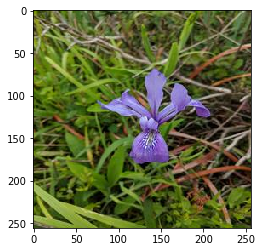

In [6]:
%matplotlib inline 
# or in colab you can use : from google.colab.patches import cv2_imshow
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
plt.imshow(image1)
plt.show()

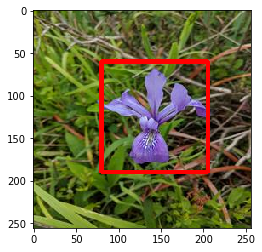

In [7]:
rect_img = image1.copy()
plt.imshow(cv2.rectangle(rect_img, (205,190), (80, 60), (255, 0, 0), 4))
plt.show()

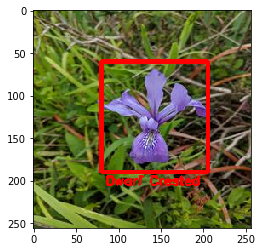

In [8]:
font = cv2.FONT_HERSHEY_SIMPLEX
text_img = rect_img.copy()
text_img = cv2.putText(text_img, "Dwarf Crested", (85, 205), font, 0.5, (255 , 0, 0), 2)
plt.imshow(text_img)
plt.show()

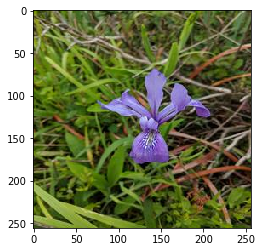

In [9]:
edge = cv2.Canny(image1, 100, 200)

plt.imshow(image1, cmap="gray")
plt.show()

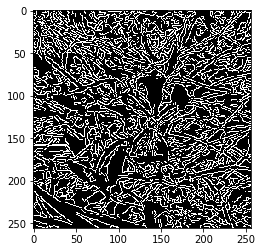

In [10]:
plt.imshow(edge, cmap="gray")
plt.show()

* Too many edges

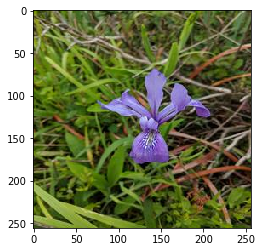

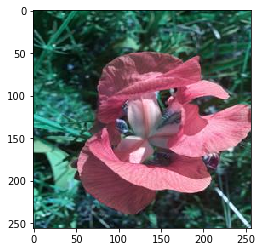

In [11]:
image2 = cv2.imread("img29.jpg")
plt.imshow(image1)
plt.show()
plt.imshow(image2)
plt.show()

In [12]:
filter_1 = np.ones(image1.shape, dtype=np.uint8) * 100

_sum = cv2.add(image2, filter_1)

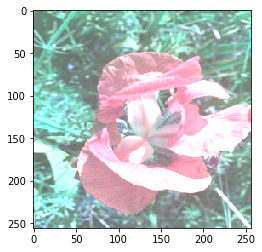

In [13]:
plt.imshow(_sum)

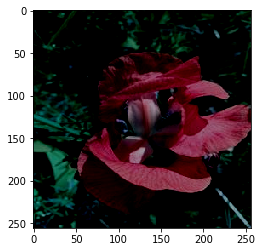

In [14]:
subtr = cv2.subtract(image2, filter_1)

plt.imshow(subtr)

### Blurring kernel

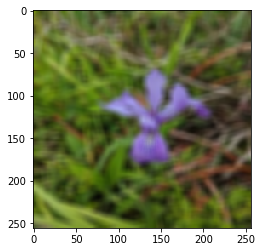

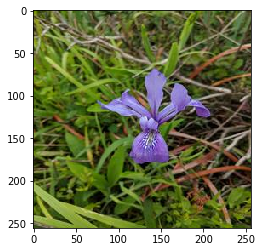

[[118 143  13]
 [115 139  13]
 [108 131  12]
 [100 122  12]]
[[109 137  18]
 [114 143  17]
 [130 161  24]
 [122 153  15]]


In [15]:
kernel_blur = np.ones((9, 9), np.float32)/81

blurred = cv2.filter2D(image1, -1, kernel_blur)

plt.imshow(blurred)
#print(blurred)
plt.show()
plt.imshow(image1)
plt.show()
print(blurred[0][0:4])
print(image1[0][0:4])

### Gausian Blur Kernel

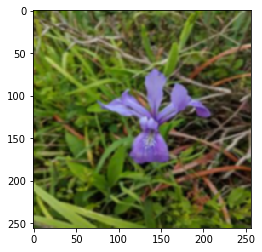

In [16]:
gaussian_blurred = cv2.GaussianBlur(image1, (5, 5), 0)

plt.imshow(gaussian_blurred)
plt.show()

### Sharpening

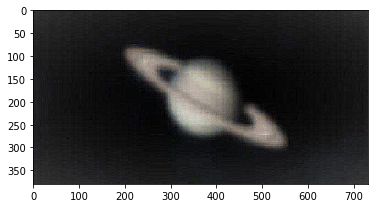

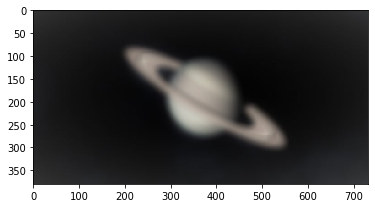

In [17]:
kernel_sharpening = np.array([[-1 ,-1, -1],
                             [-1, 9, -1],
                             [-1 ,-1, -1]])

image3 = cv2.imread("blurry.jpg")
image3 =  cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)

sharpened = cv2.filter2D(image3, -1, kernel_sharpening)
plt.imshow(sharpened)
plt.show()
plt.imshow(image3)
plt.show()

## Canny Edges

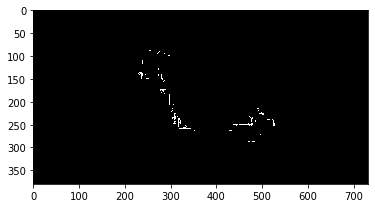

In [18]:
edges = cv2.Canny(sharpened, 100, 200)
plt.imshow(edges, cmap="gray")

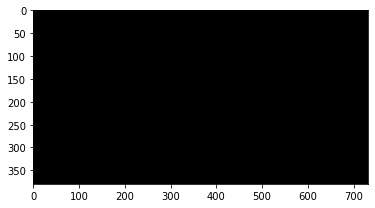

In [19]:
edges = cv2.Canny(image3, 100, 200)
plt.imshow(edges, cmap="gray")

* we cam see some of the edges in the sharpened image

## Laplacian

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


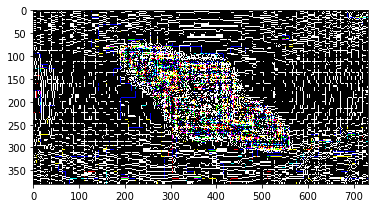

In [20]:
laplacian = cv2.Laplacian(image3, cv2.CV_64F)

plt.imshow(laplacian)

## Instagram Filters

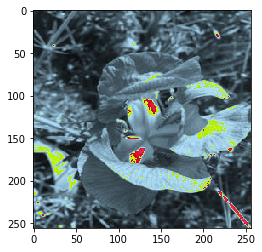

In [21]:
(b, g, r) = cv2.split(image2)
r_new = r*0.393 + g*0.769 + b*0.189
g_new = r*0.349 + g*0.686 + b*0.168
b_new = r*0.272 + g*0.534 + b*0.131
sepia = cv2.merge([b_new, g_new, r_new])
plt.imshow((sepia).astype(np.uint8))
plt.show()